<a href="https://colab.research.google.com/github/avinashjairam/time-series-forecasting-with-python/blob/main/Create_Multiple_Scatter_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt

In [32]:
#reading in csv file
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True).squeeze('columns')

In [33]:
#extracting the values from the series to a dataframe
values = DataFrame(series.values)

In [34]:
#setting the number of lags
lags = 7

In [35]:
#setting the column headers
columns = [values]

In [36]:
#shifting each value by 1 day, 2 days, 3 days etc and then making those columns in the df
for i in range(1, (lags + 1)):
  columns.append(values.shift(i))

In [37]:
#building the dataframe
dataframe = concat(columns, axis = 1)

In [38]:
#setting the all columns in the dataframe to start with the letter 't'
columns = ['t']

In [39]:
#adding the appropriate lag number to each column name
for i in range(1, (lags + 1)):
  columns.append('t-' + str(i))
dataframe.columns = columns

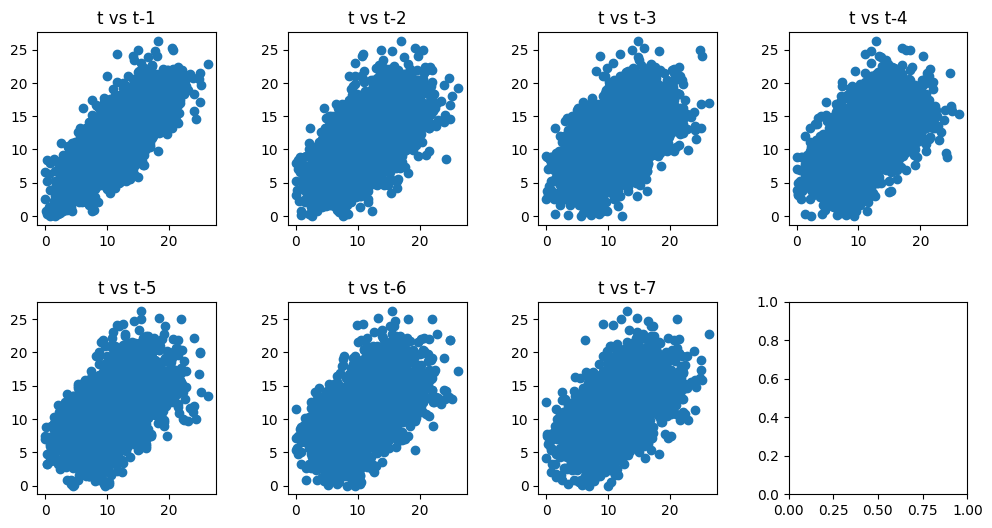

In [40]:
#plotting the various subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(1, lags + 1):
    row = (i - 1) // 4
    col = (i - 1) % 4
    ax = axes[row, col]
    ax.set_title('t vs t-' + str(i))
    ax.scatter(dataframe['t'].values, dataframe['t-' + str(i)].values)

plt.show()
